<a href="https://colab.research.google.com/github/sheniabosch/sql_business_exploration/blob/main/Eniac_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 100)

#Database importing

###brands

In [ ]:
url = 'https://drive.google.com/file/d/1hQYuzL4kAcBhmc9W0RGCC18gWmSwQd_Y/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

###products

In [ ]:
url = 'https://drive.google.com/file/d/1kxdI8q15-QiV5n1szbbh05HVDP_NL9b7/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

###orders

In [ ]:
url = 'https://drive.google.com/file/d/115Dl_6UB7ihGjJh72DwGLjWbmXxGwHrL/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

###orderlines

In [ ]:
url = 'https://drive.google.com/file/d/1r_5-gNRM_KHYSM-gX_oW9zvmrtG7tT4h/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

#Data view and summary

##products




*   sku – stock keeping unit: a unique identifier for each product
*   name – product name
*   desc – product description
*   price – base price of the product, in euros
*   promo_price – promotional price, in euros
*   in_stock – whether or not the product was in stock at the moment of the data extraction
*   type – a numerical code for product type










In [ ]:
products

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392


##Brands


*   short – the 3-character code by which the brand can be identified in the first 3 characters of products.sku

*   long – brand name




In [ ]:
brands

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
...,...,...
182,XOO,Xoopar
183,XRI,X-Rite
184,XTO,Xtorm
185,ZAG,ZaggKeys


##Orders

Every row in this file represents an order.

*   order_id – a unique identifier for each order
*   created_date – a timestamp for when the order was created
*   total_paid – the total amount paid by the customer for this order, in euros
*   state

“Shopping basket” – products have been placed in the shopping basket

“Place Order” – the order has been placed, but is awaiting shipment details

“Pending” – the order is awaiting payment confirmation

“Completed” – the order has been placed and paid, and the transaction is completed.

“Cancelled” – the order has been cancelled and the payment returned to the customer.







In [ ]:
orders

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket


###Cleaning

##orderlines

Every row represents each one of the different products involved in an order.

*   id – a unique identifier for each row in this file
*   id_order – corresponds to orders.order_id
*   product_id – an old identifier for each product, nowadays not in use
*   product_quantity – how many units of that product were purchased on that order
*   sku – stock keeping unit: a unique identifier for each product
*   unit_price – the unitary price (in euros) of each product at the moment of placing that order
*   date – timestamp for the processing of that product





In [ ]:
orderlines

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


#Cleaning

##1. Cleaning DataFrames individually

###1.1 cleaning Products

In [ ]:
products_copy = products.copy()

In [ ]:
#removing duplicates, filling None, droping None, fixing prices.
products_copy = products_copy.drop_duplicates()
products_copy['price'] = products_copy['price'].str.strip()
products_copy['promo_price'] = products_copy['promo_price'].str.strip()

def price_fix_dots(price_obj):
  if pd.isna(price_obj):
    return None
  price_obj = str(price_obj)
  if price_obj.count('.') == 2:
    index_first_dot = price_obj.find('.')
    if index_first_dot != -1:
      return price_obj[:index_first_dot] + price_obj[index_first_dot + 1:]
  else:
    return price_obj
products_copy['clean_price'] = products_copy['price'].apply(price_fix_dots)
products_copy['clean_promo_price'] = products_copy['promo_price'].apply(price_fix_dots)

products_copy['clean_price'] = pd.to_numeric(products_copy['clean_price'], errors='coerce')
products_copy['clean_promo_price'] = pd.to_numeric(products_copy['clean_promo_price'], errors='coerce')

def price_fix_value(df):
  df['fixed_promo_price'] = df['clean_promo_price'].copy()
  df.loc[df['clean_promo_price'] > df['clean_price'], 'fixed_promo_price'] = (df['clean_promo_price']/10).round(2)
  return df
price_fix_value(products_copy)

products_copy.loc[:, 'promo_price'] = products_copy['fixed_promo_price']
products_copy.loc[:, 'price'] = products_copy['clean_price']
products_copy = products_copy.drop(columns=['fixed_promo_price'])
products_copy = products_copy.drop(columns=['clean_promo_price'])
products_copy = products_copy.drop(columns=['clean_price'])

products_copy = products_copy.fillna({'desc':'name', 'type':'0'})
products_copy = products_copy.dropna(axis=0)

products_cl1 = products_copy.copy()

###1.2 cleaning Orders

In [ ]:
orders_copy = orders.copy()

In [ ]:
#droping None, droping cancelled,shopping basket, pending
orders_copy = orders_copy.dropna(axis=0)
orders_copy = orders_copy[orders_copy['state'].isin(['Completed', 'Place Order'])]
orders_copy['created_date'] = pd.to_datetime(orders_copy['created_date'], errors='coerce')

In [ ]:
orders_cl1 = orders_copy.copy()

### 1.3 cleaning Orderlines

In [ ]:
orderlines_copy = orderlines.copy()

In [ ]:
def price_fix_dots(price_obj):
  if pd.isna(price_obj):
    return None
  price_obj = str(price_obj)
  if price_obj.count('.') == 2:
    index_first_dot = price_obj.find('.')
    if index_first_dot != -1:
      return price_obj[:index_first_dot] + price_obj[index_first_dot + 1:]
  else:
    return price_obj
orderlines_copy['clean_unit_price'] = orderlines_copy['unit_price'].apply(price_fix_dots)
orderlines_copy.loc[:,'unit_price'] = orderlines_copy['clean_unit_price']
orderlines_copy = orderlines_copy.drop(columns=['clean_unit_price'])

In [ ]:
orderlines_copy['unit_price'] = pd.to_numeric(orderlines_copy['unit_price'], errors='coerce')
orderlines_copy['date'] = pd.to_datetime(orderlines_copy['date'], errors='coerce')

In [ ]:
orderlines_copy.loc[:,'sum_price'] = (orderlines_copy['unit_price'] * orderlines_copy['product_quantity'])

In [ ]:
orderlines_cl1 = orderlines_copy.copy()

##2. Cleaning DataFrames multi dimensional

###2.1 cleaning, orderlines and orders based on order_id

In [ ]:
#filtering orderlines based on order_id on orders
filtered_orders = orders_cl1['order_id']
orderlines_cl1 = orderlines_cl1[orderlines_cl1['id_order'].isin(filtered_orders)]

In [ ]:
#filtering orders based on id_order on orderlines
orderlines_in_order = orderlines_cl1['id_order']
orders_cl1 = orders_cl1[orders_cl1['order_id'].isin(orderlines_in_order)]

In [ ]:
#checking if unique values are same
orders_cl1.groupby('order_id').nunique().count(), orderlines_cl1.groupby('id_order').nunique().count()

(created_date    75139
 total_paid      75139
 state           75139
 dtype: int64,
 id                  75139
 product_id          75139
 product_quantity    75139
 sku                 75139
 unit_price          75139
 date                75139
 sum_price           75139
 dtype: int64)

###2.2 cleaning products based on sku in orderlines and products

In [ ]:
#checking if all sku from products are in orderlines
products_cl1.groupby('sku').nunique().count(), orderlines_cl1.groupby('sku').nunique().count()

(name           10534
 desc           10534
 price          10534
 promo_price    10534
 in_stock       10534
 type           10534
 dtype: int64,
 id                  6498
 id_order            6498
 product_id          6498
 product_quantity    6498
 unit_price          6498
 date                6498
 sum_price           6498
 dtype: int64)

In [ ]:
#since we have more sku in products than we sold, we are going to remove the other products too.
products_cl2 = products_cl1.copy()
unique_sku_orderlines = orderlines_cl1['sku'].drop_duplicates()
products_cl2 = products_cl2[products_cl2['sku'].isin(unique_sku_orderlines)]

In [ ]:
#checking if all sku from products are in orderlines
products_cl2.groupby('sku').nunique().count(), orderlines_cl1.groupby('sku').nunique().count()

(name           6411
 desc           6411
 price          6411
 promo_price    6411
 in_stock       6411
 type           6411
 dtype: int64,
 id                  6498
 id_order            6498
 product_id          6498
 product_quantity    6498
 unit_price          6498
 date                6498
 sum_price           6498
 dtype: int64)

In [ ]:
#since we have more sku in orderlines than products, we are going to remove orders related to that sku`s
orderlines_id_filter = orderlines_cl1.loc[~orderlines_cl1['sku'].isin(products_cl2['sku']), 'id_order']
orderlines_id_filter = orderlines_id_filter.drop_duplicates()
orderlines_cl1 = orderlines_cl1[~orderlines_cl1['id_order'].isin(orderlines_id_filter)]

In [ ]:
products_cl2.groupby('sku').nunique().count(), orderlines_cl1.groupby('sku').nunique().count()

(name           6411
 desc           6411
 price          6411
 promo_price    6411
 in_stock       6411
 type           6411
 dtype: int64,
 id                  6401
 id_order            6401
 product_id          6401
 product_quantity    6401
 unit_price          6401
 date                6401
 sum_price           6401
 dtype: int64)

###2.3 cleaning orderlines and orders based on order_id after step 2

In [ ]:
#filtering orderlines based on order_id on orders
filtered_orders2 = orders_cl1['order_id']
orderlines_cl1 = orderlines_cl1[orderlines_cl1['id_order'].isin(filtered_orders2)]
#filtering orders based on id_order on orderlines
orderlines_in_order2 = orderlines_cl1['id_order']
orders_cl1 = orders_cl1[orders_cl1['order_id'].isin(orderlines_in_order2)]

In [ ]:
#checking if unique values are same
orders_cl1.groupby('order_id').nunique().count(), orderlines_cl1.groupby('id_order').nunique().count()

(created_date    74664
 total_paid      74664
 state           74664
 dtype: int64,
 id                  74664
 product_id          74664
 product_quantity    74664
 sku                 74664
 unit_price          74664
 date                74664
 sum_price           74664
 dtype: int64)

###2.4 Creating Categories, Sub-categories, Brands for products

In [ ]:
#making new df for categories
products_category = products_cl1.copy()

In [ ]:
#merging brands to new column
products_category['brand_short'] = products_category['sku'].str[0:3]
products_category = products_category.merge(brands, left_on='brand_short', right_on='short')
products_category = products_category.drop(columns=['brand_short','short','in_stock','promo_price'])
products_category = products_category.rename(columns={'long':'brand'})

In [ ]:
products_category.loc[products_category['brand'] == 'Pack']

,sku,name,desc,price,type,brand
81,PAC0023,OWC Data Doubler Pack MacBook / MacBook Pro,Pack Replacement Superdrive for SSD / HDD + bo...,107.99,12755395,Pack
92,PAC0508,Apple MacBook Pro 133 '' 25GHz | 16GB RAM | 1T...,Apple MacBook Pro Fusion Drive 16GB 2 internal...,1919.00,1282,Pack
93,PAC0507,Apple MacBook Pro 133 '' 25Ghz | 16GB RAM | Fu...,Apple MacBook Pro Fusion Drive 16GB 2 internal...,1639.00,1282,Pack
94,PAC0515,"Apple MacBook Pro 133 ""i7 29GHz | RAM 16GB | 5...",Apple MacBook Pro 133 inches (MD101Y / A) and ...,2039.00,1282,Pack
95,PAC0510,"Apple MacBook Pro 133 ""i7 29GHz | RAM 16GB | 7...",Apple MacBook Pro Fusion Drive 16GB 2 internal...,2039.00,1282,Pack
...,...,...,...,...,...,...
10074,PAC2497,OWC ThuderBay Thunderbolt RAID 5 4 3 | 32TB (4...,outer box with RAID5 disc 25 inch and 35 inch ...,2165.95,11935397,Pack
10075,PAC2498,OWC ThuderBay Thunderbolt RAID 5 4 3 | 40TB (4...,outer box with RAID5 disc 25 inch and 35 inch ...,2325.95,11935397,Pack
10076,PAC2499,OWC ThuderBay Thunderbolt RAID 5 4 3 | 48TB (4...,outer box with RAID5 disc 25 inch and 35 inch ...,2725.95,11935397,Pack
10102,PAC2509,substitution Magic Mouse 2 Trackpad 2,Replacement Service Mouse Trackpad at the time...,149.00,1387,Pack


In [ ]:
#we have many brands named 'Pack', with codes below, we can extract exact brands  approximetly 99.9%
products_category.loc[(products_category["name"].str.contains("apple", case=False)) & (products_category['brand'] == 'Pack'), "brand"] = "Apple"
products_category.loc[(products_category["name"].str.contains("NewerTech", case=False)) & (products_category['brand'] == 'Pack'), "brand"] = "NewerTech"
products_category.loc[(products_category["name"].str.contains("OWC", case=False)) & (products_category['brand'] == 'Pack'), "brand"] = "OWC"
products_category.loc[(products_category["name"].str.contains("Kingston", case=False)) & (products_category['brand'] == 'Pack'), "brand"] = "Kingston"
products_category.loc[(products_category["name"].str.contains("samsung", case=False)) & (products_category['brand'] == 'Pack'), "brand"] = "Samsung"
products_category.loc[(products_category["name"].str.contains("Synology", case=False)) & (products_category['brand'] == 'Pack'), "brand"] = "Synology"
products_category.loc[(products_category["name"].str.contains("WD")) & (products_category['brand'] == 'Pack'), "brand"] = "Western Digital"
products_category.loc[(products_category["name"].str.contains("QNAP", case=False)) & (products_category['brand'] == 'Pack'), "brand"] = "QNAP"
products_category.loc[(products_category["name"].str.contains("Crucial", case=False)) & (products_category['brand'] == 'Pack'), "brand"] = "Crucial"

In [ ]:
#a function to create category
def sub_categorize_products(df: pd.DataFrame, type_column: str = 'type', category_column: str = 'category') -> pd.DataFrame:
    df[category_column] = pd.NA

    category_mapping = {
        'Network Attached Storage and Accessories': ['12175397', '1404','1280'],
        'Storage Unit': ['1433', '12655397', '12215397', '11935397'],
        'Computer': ['118692158', '2158', '1,02E+12', '5,74E+15', '1282','21632158','4259','113464259'],
        'Computer RAM': ['1364'],
        'Monitor': ['1296'],
        'Network': ['1334'],
        'Headphone': ['5384'],
        'Speaker': ['5398'],
        'Tablet': ['1405'],
        'Apple Watch': ['24885185', '24895185'],
        'Apple iPod': ['11821715'],
        'Adapter': ['12755395', '13955395', '1276', '12995397', '12585395','5395'],
        'iPhone Case Cover': ['13555403', '11865403', '5405'],
        'Mobile Device Accessories and Smart Devices': ['101781405', '12355400', '11905404'],
        'iPad Case': ['12635403'],
        'MacBook Bag Cover': ['13835403', '1392','10230'],
        'Cables': ['12285400', '1230', '1325','42945397'],
        'Storage Card Key': ['57445397'],
        'Pen Pointer': ['1229'],
        'Apple Watch Accessories': ['2449','2434'],
        'Charger': ['13005399', '13615399'],
        'Power Bank': ['1515', '5,49E+11'],
        'Stand Holder': ['1216', '8696', '5720'],
        'Repair Service & Tools': ['1,44E+11', '14305406','12645406','10142'],
        'iPhone Part': ['21485407'],
        'Keyboard': ['13855401'],
        'Mouse': ['1387'],
        'Other' : ['1298','9094'],
    }

    for category, type_values in category_mapping.items():
        mask = df[type_column].isin(type_values)
        df.loc[mask, category_column] = category

    return df

In [ ]:
sub_categorize_products(products_category, 'type', 'category')

,sku,name,desc,price,type,brand,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,8696,Rain Design,Stand Holder
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,13855401,Apple,Keyboard
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,1387,Apple,Mouse
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,1230,Apple,Cables
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1364,Kingston,Computer RAM
...,...,...,...,...,...,...,...
10318,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,12282,Belkin,<NA>
10319,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1392,Thule,MacBook Bag Cover
10320,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1392,Thule,MacBook Bag Cover
10321,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,1392,Thule,MacBook Bag Cover


In [ ]:
# combining category function with this codes, categorize 99% of our data, except 112 products that they will be classified as 'Other'
products_category.loc[(products_category["name"].str.contains("keyboard", case=False)) & (products_category['category'].isna()), "category"] = "Keyboard"
products_category.loc[(products_category["name"].str.contains("mouse", case=False)) & (products_category['category'].isna()), "category"] = "Mouse"
products_category.loc[(products_category["name"].str.contains("charg", case=False)) & (products_category['category'].isna()), "category"] = "Charger"
products_category.loc[(products_category["name"].str.contains("connect", case=False)) & (products_category['category'].isna()), "category"] = "Adapter"
products_category.loc[(products_category["name"].str.contains("adapter", case=False)) & (products_category['category'].isna()), "category"] = "Adapter"
products_category.loc[(products_category["desc"].str.contains("adapter", case=False)) & (products_category['category'].isna()), "category"] = "Adapter"
products_category.loc[(products_category["name"].str.contains("cable", case=False)) & (products_category['category'].isna()), "category"] = "Cables"
products_category.loc[(products_category["name"].str.contains("apple iphone", case=False)) & (products_category['category'].isna()) & (products_category['price'] > 250) , "category"] = "iPhone"
products_category.loc[(products_category["name"].str.contains("apple ipad", case=False)) & (products_category['category'].isna()) & (products_category['price'] > 250) , "category"] = "iPad"
products_category.loc[(products_category["name"].str.contains("protector", case=False)) & (products_category['category'].isna()), "category"] = "iPhone Case Cover"
products_category.loc[(products_category["name"].str.contains("apple macbook", case=False)) & (products_category['category'].isna()) & (products_category['price'] > 250) , "category"] = "Computer"
products_category.loc[(products_category["name"].str.contains("apple imac", case=False)) & (products_category['category'].isna()) & (products_category['price'] > 250) , "category"] = "Computer"
products_category.loc[(products_category["name"].str.contains("apple mac", case=False)) & (products_category['category'].isna()) & (products_category['price'] > 250) , "category"] = "Computer"
products_category.loc[(products_category["name"].str.contains("apple iwatch", case=False)) & (products_category['category'].isna()) & (products_category['price'] > 250) , "category"] = "iWatch"
products_category.loc[(products_category["name"].str.contains("repair", case=False)) & (products_category['category'].isna()), "category"] = "Repair Service & Tools"
products_category.loc[(products_category["name"].str.contains("ifix", case=False)) & (products_category['category'].isna()), "category"] = "Repair Service & Tools"
products_category.loc[(products_category["name"].str.contains("service", case=False)) & (products_category['category'].isna()), "category"] = "Repair Service & Tools"
products_category.loc[(products_category["name"].str.contains("care", case=False)) & (products_category['category'].isna()), "category"] = "Repair Service & Tools"
products_category['category'] = products_category['category'].fillna('Other')

In [ ]:
#creating another function for main category
def categorize_products(df: pd.DataFrame, type_column: str = 'category', category_column: str = 'main_category') -> pd.DataFrame:
    df[category_column] = pd.NA

    category_mapping = {
        'Apple Electronics' : ['Computer','Apple Watch','Apple iPod','iPhone','iPad'],
        'Computer Accessories' : ['Keyboard','Mouse','Computer RAM','MacBook Bag Cover','Adapter','Monitor','Storage Unit'],
        'Mobile Accessoires' : ['Stand Holder','Cables','Charger','iPhone Case Cover','Power Bank','Mobile Device Accessories and Smart Devices','iPad Case','Pen Pointer','Storage Card Key','Headphone','Speaker','Apple Watch Accessories','Tablet'],
        'Network' : ['Network Attached Storage and Accessories','Network'],
        'Repair' : ['Repair Service & Tools','iPhone Part'],
        'Other' : ['Other']

    }

    for category, type_values in category_mapping.items():
        mask = df[type_column].isin(type_values)
        df.loc[mask, category_column] = category

    return df

In [ ]:
categorize_products(products_category, 'category', 'main_category')

,sku,name,desc,price,type,brand,category,main_category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,8696,Rain Design,Stand Holder,Mobile Accessoires
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,13855401,Apple,Keyboard,Computer Accessories
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,1387,Apple,Mouse,Computer Accessories
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,1230,Apple,Cables,Mobile Accessoires
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1364,Kingston,Computer RAM,Computer Accessories
...,...,...,...,...,...,...,...,...
10318,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,12282,Belkin,Other,Other
10319,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1392,Thule,MacBook Bag Cover,Computer Accessories
10320,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1392,Thule,MacBook Bag Cover,Computer Accessories
10321,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,1392,Thule,MacBook Bag Cover,Computer Accessories


In [ ]:
#another step to make 2 groups of 'Used' and 'New' products
second_hand_words = ['open','used','refurbish','second hand','like new','reconditioned','without box']
second_hand_pattern = '|'.join(second_hand_words)
products_category.loc[products_category["name"].str.contains(second_hand_pattern, case=False), "Condition"] = "Used"
products_category['Condition'] = products_category['Condition'].fillna('New')

##3. Validating Data

###3.1 validating cleaned prices in products based on prices in orderlines

since we have cleaned our products dataframe, and corrected as many as possible, we got some unrealistic prices.
we will compare prices in products dataframe with prices that we have actually sold.

In [ ]:
#finding mode for each sku in orderlines dataframe
sku_group_orderlines = orderlines_cl1.groupby('sku')['unit_price'].apply(lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else None).reset_index()

In [ ]:
#merging prices from 2 dataframe, and droping unnecessary columns
products_combined = products_cl2.merge(sku_group_orderlines, on='sku')
products_combined = products_combined.drop(columns=['desc', 'in_stock', 'type'])

In [ ]:
#checking how many wrong prices we have
products_combined['price_check'] = products_combined['price'] >= products_combined['unit_price']
products_combined.loc[products_combined['price_check'] == False]

,sku,name,price,promo_price,unit_price,price_check
26,JMO0026,Just Mobile Lazy Couch Support Mac and iPad,19.95,19.99,19.99,False
118,REP0060,iPhone 4s battery repair,29.99,29.99,39.99,False
119,REP0068,Headset calls iPhone 4s repair,39.99,39.99,49.90,False
128,KIN0074,Kingston DataTraveler SE9 8GB USB 2.0 key,4.99,5.78,5.22,False
177,PIE0007,Internal Battery for iPhone 4,14.95,14.99,14.99,False
...,...,...,...,...,...,...
5311,ALL0024,Allocacoc PowerCube rewirable Regleta White / ...,24.95,24.99,24.99,False
5822,BNQ0065,"EX3501R BenQ Monitor 35 ""WQHD Curvy HDR Ultra ...",743.00,743.00,793.00,False
5825,BNQ0069,"EW2770QZ BenQ Monitor 27 ""QHD DP HDMI",399.00,399.00,429.00,False
6045,CRU0061,Crucial MX500 500GB SSD 7mm,139.67,129.99,140.50,False


In [ ]:
#a big pattern was that prices were 10 times higher than actually sold prices, we are solving that problem
products_combined['price_check2'] = (products_combined['price'] / products_combined['unit_price']) > 9

products_combined['price_check2'].value_counts()

,count
price_check2,
False,6225
True,176


In [ ]:
#replacing prices that matched our pattern
products_combined.loc[products_combined['price_check2'] == True, 'price'] = products_combined.loc[products_combined['price_check2'] == True, 'unit_price']

In [ ]:
#last touches
products_combined = products_combined.rename(columns={'price':'new_price', 'unit_price':'mode_price'})
products_combined = products_combined.drop(columns=['promo_price','price_check','price_check2'])
products_combined['new_price'] = pd.to_numeric(products_combined['new_price'], errors='coerce')

In [ ]:
products_combined

,sku,name,new_price,mode_price
0,RAI0007,Silver Rain Design mStand Support,59.99,44.99
1,APP0023,Apple Mac Keyboard Keypad Spanish,59.00,55.99
2,APP0025,Mighty Mouse Apple Mouse for Mac,59.00,56.99
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,25.00,23.99
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,34.99,34.99
...,...,...,...,...
6396,MMW0014,"My MW Case MacBook Pro 13 ""(Late 2016) Coral",29.99,22.99
6397,MMW0012,"My MW Case MacBook Pro 13 ""(Late 2016) Blue Sa...",29.99,22.99
6398,MMW0013,"My MW Case MacBook Pro 13 ""(Late 2016) White S...",29.99,22.99
6399,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",29.99,22.99


#Merging

We will list all dataframes we have, and start merging them accordingly as we need and preparing data for analysis

##cleaned dataframes that we are going to use

Dataframes:

*   products_combined (corrected prices)
*   products_category (products with category)
* orderlines_cl1 (cleaned orderlines)
* orders_cl1 (cleaned orders)



In [ ]:
products_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6401 entries, 0 to 6400
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sku         6401 non-null   object 
 1   name        6401 non-null   object 
 2   new_price   6401 non-null   float64
 3   mode_price  6401 non-null   float64
dtypes: float64(2), object(2)
memory usage: 200.2+ KB


In [ ]:
products_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10323 entries, 0 to 10322
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sku            10323 non-null  object
 1   name           10323 non-null  object
 2   desc           10323 non-null  object
 3   price          10323 non-null  object
 4   type           10323 non-null  object
 5   brand          10323 non-null  object
 6   category       10323 non-null  object
 7   main_category  10323 non-null  object
 8   Condition      10323 non-null  object
dtypes: object(9)
memory usage: 726.0+ KB


In [ ]:
orderlines_cl1

,id,id_order,product_id,product_quantity,sku,unit_price,date,sum_price
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
11,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99
15,1119131,299553,0,1,APP1854,3278.99,2017-01-01 02:14:47,3278.99
...,...,...,...,...,...,...,...,...
293973,1650193,527394,0,1,APP1922,161.00,2018-03-14 13:55:15,161.00
293975,1650195,527396,0,1,PAC0653,141.58,2018-03-14 13:55:44,141.58
293976,1650196,527384,0,1,LAC0227,249.99,2018-03-14 13:56:02,249.99
293977,1650198,527397,0,1,JBL0122,42.99,2018-03-14 13:56:38,42.99


In [ ]:
orders_cl1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74664 entries, 1 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      74664 non-null  int64         
 1   created_date  74664 non-null  datetime64[ns]
 2   total_paid    74664 non-null  float64       
 3   state         74664 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.8+ MB


##1. creating new dataframes

###1.1 final_products: merging cleaned products with categories and revising column orders

now we have cleaned products with new assigned categories and validated price

In [ ]:
final_products = pd.NA

In [ ]:
final_products = products_combined.merge(products_category, on='sku', how='left')
final_products = final_products.drop(columns=['name_y', 'price','type'])
desc_column = final_products.pop('desc')
final_products.insert(2,'desc',desc_column)
final_products = final_products.rename(columns={'name_x':'name'})

###1.2 final_orderlines: including base prices and categories for each orderline

In [ ]:
final_products

,sku,name,desc,new_price,mode_price,brand,category,main_category,Condition
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,44.99,Rain Design,Stand Holder,Mobile Accessoires,New
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,55.99,Apple,Keyboard,Computer Accessories,New
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,56.99,Apple,Mouse,Computer Accessories,New
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,23.99,Apple,Cables,Mobile Accessoires,New
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,34.99,Kingston,Computer RAM,Computer Accessories,New
...,...,...,...,...,...,...,...,...,...
6396,MMW0014,"My MW Case MacBook Pro 13 ""(Late 2016) Coral",Avoid shock and damage to your MacBook Pro 13-...,29.99,22.99,My MW,MacBook Bag Cover,Computer Accessories,New
6397,MMW0012,"My MW Case MacBook Pro 13 ""(Late 2016) Blue Sa...",Avoid shock and damage to your MacBook Pro 13-...,29.99,22.99,My MW,MacBook Bag Cover,Computer Accessories,New
6398,MMW0013,"My MW Case MacBook Pro 13 ""(Late 2016) White S...",Avoid shock and damage to your MacBook Pro 13-...,29.99,22.99,My MW,MacBook Bag Cover,Computer Accessories,New
6399,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",Avoid shock and damage to your MacBook Pro 13-...,29.99,22.99,My MW,MacBook Bag Cover,Computer Accessories,New


In [ ]:
final_orderlines = pd.NA

# New Section

In [ ]:
base_prices_category = final_products[['sku', 'new_price','category','main_category','Condition','brand']]
base_prices_category = base_prices_category.rename(columns={'new_price':'base_price'})

final_orderlines = pd.merge(orderlines_cl1, base_prices_category, on='sku', how='left')
final_orderlines['base_price'] = pd.to_numeric(final_orderlines['base_price'], errors='coerce')
final_orderlines['base_price'] = final_orderlines['base_price'].fillna(final_orderlines['unit_price'])
final_orderlines['price_check'] = final_orderlines['unit_price'] > final_orderlines['base_price']
final_orderlines.loc[final_orderlines['price_check'] == True, 'unit_price'] = final_orderlines['base_price']
final_orderlines.loc[:,'sum_price'] = (final_orderlines['unit_price']) * (final_orderlines['product_quantity'])
final_orderlines.loc[:,'sum_base_price'] = (final_orderlines['base_price'])*(final_orderlines['product_quantity'])
final_orderlines['sum_base_price'] = pd.to_numeric(final_orderlines['sum_base_price'], errors='coerce')
final_orderlines['sum_base_price'] = final_orderlines['sum_base_price'].fillna(final_orderlines['sum_price'])
final_orderlines = final_orderlines.drop(columns=['price_check'])
for col in ['category', 'main_category', 'Condition']:
    final_orderlines[col] = final_orderlines[col].fillna('Other')

In [ ]:
date_column = final_orderlines.pop('date')
final_orderlines.insert(5,'date',date_column)
sum_base_price_column = final_orderlines.pop('sum_base_price')
final_orderlines.insert(9,'sum_base_price',sum_base_price_column)
final_orderlines = final_orderlines.drop(columns=['product_id'])

In [ ]:
final_orderlines['off_status'] = final_orderlines['base_price'] > final_orderlines['unit_price']
final_orderlines['off_percentage'] = (1-((final_orderlines['unit_price'])/(final_orderlines['base_price'])))*100

In [ ]:
final_orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95651 entries, 0 to 95650
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                95651 non-null  int64         
 1   id_order          95651 non-null  int64         
 2   product_quantity  95651 non-null  int64         
 3   sku               95651 non-null  object        
 4   date              95651 non-null  datetime64[ns]
 5   unit_price        95651 non-null  float64       
 6   sum_price         95651 non-null  float64       
 7   base_price        95651 non-null  float64       
 8   sum_base_price    95651 non-null  float64       
 9   category          95651 non-null  object        
 10  main_category     95651 non-null  object        
 11  Condition         95651 non-null  object        
 12  brand             95587 non-null  object        
 13  off_status        95651 non-null  bool          
 14  off_percentage    9565

###1.3 creating necessary groupby`s

total order value and total order base value

In [ ]:
total_order_value = final_orderlines.groupby('id_order')[['product_quantity','sum_price','sum_base_price','off_status']].sum()

In [ ]:
total_order_value['off_percentage'] = (1-((total_order_value['sum_price'])/total_order_value['sum_base_price']))*100

In [ ]:
total_order_value

,product_quantity,sum_price,sum_base_price,off_status,off_percentage
id_order,,,,,
241423,1,129.16,139.99,1,7.74
242832,1,10.77,17.99,1,40.13
243330,1,77.99,99.99,1,22.00
245275,1,149.00,179.00,1,16.76
245595,2,105.98,207.90,1,49.02
...,...,...,...,...,...
527386,1,161.00,179.00,1,10.06
527394,1,161.00,179.00,1,10.06
527396,1,141.58,215.98,1,34.45


category group

In [ ]:
final_orderlines

,id,id_order,product_quantity,sku,date,unit_price,sum_price,base_price,sum_base_price,category,main_category,Condition,brand,off_status,off_percentage
0,1119116,299545,1,OWC0100,2017-01-01 01:46:16,47.49,47.49,60.99,60.99,Adapter,Computer Accessories,New,OWC,True,22.13
1,1119119,299546,1,IOT0014,2017-01-01 01:50:34,18.99,18.99,22.95,22.95,Stand Holder,Mobile Accessoires,New,iOttie,True,17.25
2,1119120,295347,1,APP0700,2017-01-01 01:54:11,72.19,72.19,89.00,89.00,Charger,Mobile Accessoires,New,Apple,True,18.89
3,1119126,299549,1,PAC0929,2017-01-01 02:07:42,2565.99,2565.99,3209.00,3209.00,Computer,Apple Electronics,New,Apple,True,20.04
4,1119131,299553,1,APP1854,2017-01-01 02:14:47,3278.99,3278.99,3279.00,3279.00,Computer,Apple Electronics,New,Apple,True,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95646,1650193,527394,1,APP1922,2018-03-14 13:55:15,161.00,161.00,179.00,179.00,Headphone,Mobile Accessoires,New,Apple,True,10.06
95647,1650195,527396,1,PAC0653,2018-03-14 13:55:44,141.58,141.58,215.98,215.98,Storage Unit,Computer Accessories,New,Samsung,True,34.45
95648,1650196,527384,1,LAC0227,2018-03-14 13:56:02,249.99,249.99,299.99,299.99,Storage Unit,Computer Accessories,New,LaCie,True,16.67
95649,1650198,527397,1,JBL0122,2018-03-14 13:56:38,42.99,42.99,49.95,49.95,Headphone,Mobile Accessoires,New,JBL,True,13.93


In [ ]:
main_category_group = final_orderlines.groupby('main_category').agg({'sum_price':'sum','product_quantity':'sum','off_percentage':'mean'})

In [ ]:
sub_category_group = final_orderlines.groupby('category').agg({'sum_price':'sum','product_quantity':'sum','off_percentage':'mean'})

In [ ]:
condition_group = final_orderlines.groupby('Condition').agg({'sum_price':'sum','product_quantity':'sum','off_percentage':'mean'})

In [ ]:
brand_group = final_orderlines.groupby('brand').agg({'sum_price':'sum','product_quantity':'sum','off_percentage':'mean'})

In [ ]:
top_15_brand = brand_group.sort_values('sum_price', ascending=False).nlargest(15,columns='sum_price')

In [ ]:
main_category_group

,sum_price,product_quantity,off_percentage
main_category,,,
Apple Electronics,22029806.65,17854,7.63
Computer Accessories,5495815.14,37554,18.78
Mobile Accessoires,2841022.64,39734,23.77
Network,1137224.28,3076,11.90
Other,278268.66,1929,25.11
Repair,441263.50,6744,17.52


In [ ]:
sub_category_group

,sum_price,product_quantity,off_percentage
category,,,
Adapter,417390.09,7026,23.24
Apple Watch,548381.60,1416,4.26
Apple Watch Accessories,21763.36,595,25.96
Apple iPod,27650.48,149,10.63
Cables,160967.37,6183,29.88
Charger,166195.63,3089,19.53
Computer,15079865.32,7541,9.99
Computer RAM,621000.48,5940,14.41
Headphone,396114.71,3754,26.87


In [ ]:
condition_group = condition_group.drop('Other')


In [ ]:
condition_group

,sum_price,product_quantity,off_percentage
Condition,,,
New,31459812.53,104540,18.15
Used,751793.51,2275,29.07


##2. Merging

###2.1 Merging Grouped orderlines with orders

In [ ]:
Merged_orders = orders_cl1.merge(total_order_value, left_on='order_id', right_on='id_order', how= 'inner')

In [ ]:
Merged_orders

,order_id,created_date,total_paid,state,product_quantity,sum_price,sum_base_price,off_status,off_percentage
0,241423,2017-11-06 13:10:02,136.15,Completed,1,129.16,139.99,1,7.74
1,242832,2017-12-31 17:40:03,15.76,Completed,1,10.77,17.99,1,40.13
2,243330,2017-02-16 10:59:38,84.98,Completed,1,77.99,99.99,1,22.00
3,245275,2017-06-28 11:35:37,149.00,Completed,1,149.00,179.00,1,16.76
4,245595,2017-01-21 12:52:47,112.97,Completed,2,105.98,207.90,1,49.02
...,...,...,...,...,...,...,...,...,...
74659,527386,2018-03-14 13:49:48,161.00,Place Order,1,161.00,179.00,1,10.06
74660,527394,2018-03-14 13:55:15,161.00,Place Order,1,161.00,179.00,1,10.06
74661,527396,2018-03-14 13:55:44,141.58,Place Order,1,141.58,215.98,1,34.45
74662,527397,2018-03-14 13:56:38,42.99,Place Order,1,42.99,49.95,1,13.93


#Analyzing

##1. Analyzing sales


Descriptive statistics for unit_price:
 count   95651.00
mean      322.09
std       619.42
min         0.01
25%        31.99
50%        82.99
75%       290.33
max     14725.00
Name: unit_price, dtype: float64


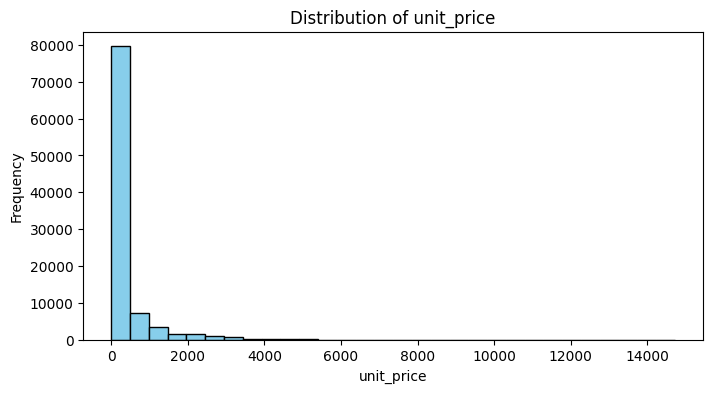

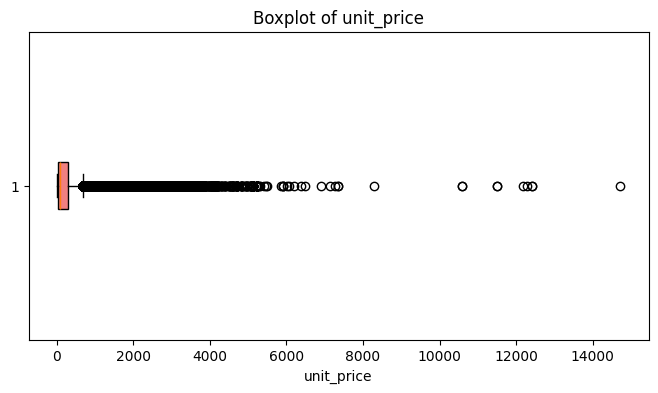


Descriptive statistics for sum_price:
 count   95651.00
mean      336.89
std       650.00
min         0.01
25%        33.24
50%        88.00
75%       315.27
max     14725.00
Name: sum_price, dtype: float64


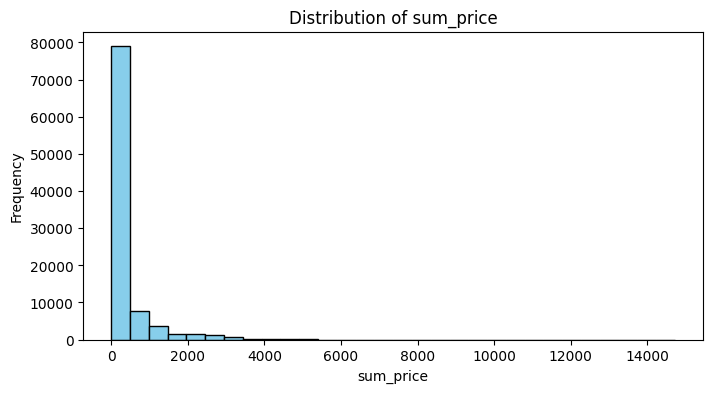

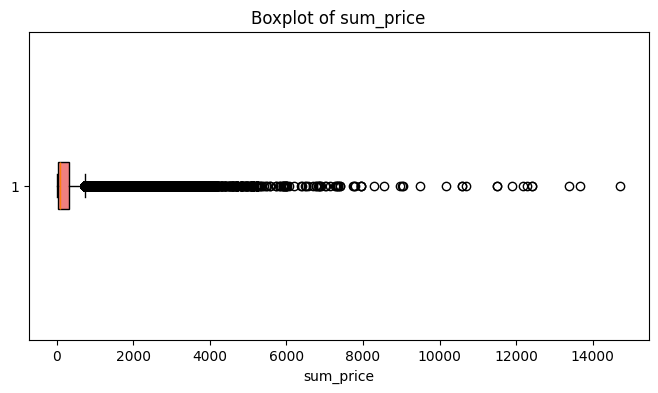


Descriptive statistics for base_price:
 count   95651.00
mean      363.58
std       688.92
min         0.01
25%        43.90
50%        99.99
75%       352.75
max     15339.00
Name: base_price, dtype: float64


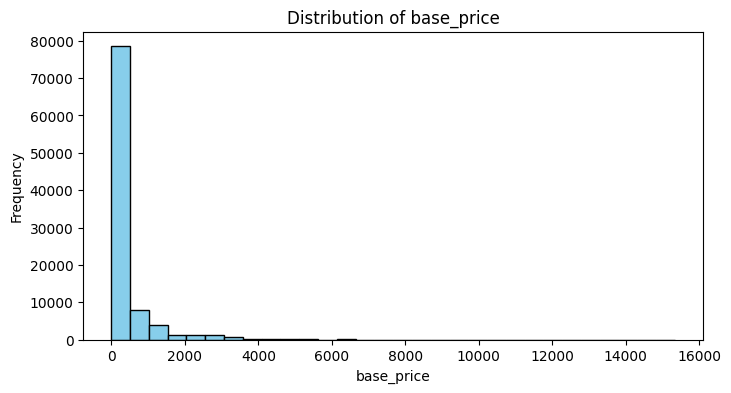

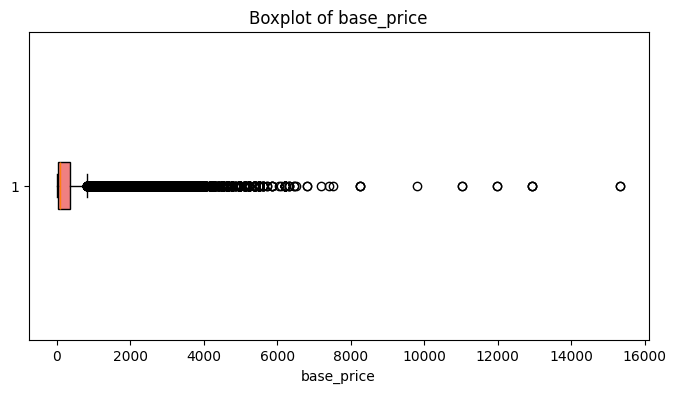


Descriptive statistics for sum_base_price:
 count   95651.00
mean      380.92
std       723.79
min         0.01
25%        45.00
50%       107.98
75%       379.00
max     16107.00
Name: sum_base_price, dtype: float64


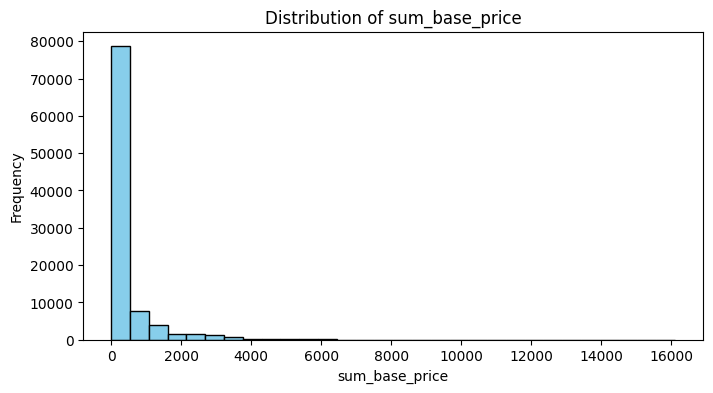

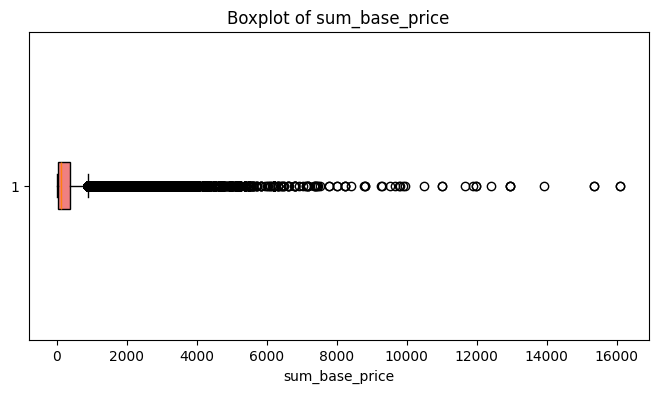


Descriptive statistics for off_percentage:
 count   95651.00
mean       18.39
std        16.42
min         0.00
25%         6.02
50%        15.00
75%        25.01
max        97.71
Name: off_percentage, dtype: float64


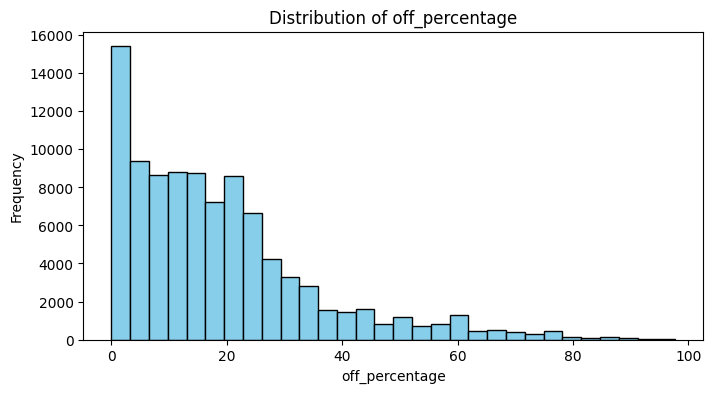

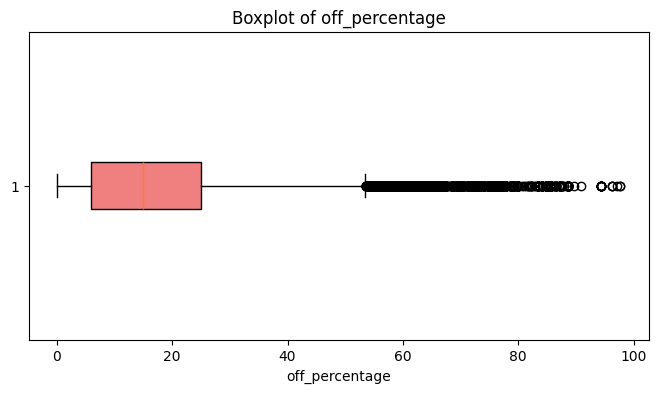


Distribution of off_status:
 off_status
True     86623
False     9028
Name: count, dtype: int64


In [ ]:
# Analyze distributions of key variables
key_variables = ['unit_price', 'sum_price', 'base_price', 'sum_base_price', 'off_percentage']
for col in key_variables:
    print(f"\nDescriptive statistics for {col}:\n", final_orderlines[col].describe())
    plt.figure(figsize=(8, 4))  # Adjust figure size
    plt.hist(final_orderlines[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.boxplot(final_orderlines[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

print("\nDistribution of off_status:\n", final_orderlines['off_status'].value_counts())

# Identify Black Friday 2017 week (Black Friday 2017 was on November 24th)
black_friday_2017 = pd.to_datetime('2017-11-24')
bf_start = black_friday_2017 - pd.Timedelta(days=6)  # Start of the week
bf_end = black_friday_2017 + pd.Timedelta(days=6)  # End of the week

In [ ]:
# Black Friday Flag
final_orderlines['black_friday'] = (final_orderlines['date'] >= '2017-11-18') & (final_orderlines['date'] <= '2017-11-30')

# Revenue Calculation
final_orderlines['revenue_with_discount'] = final_orderlines.apply(lambda row: row['sum_price'] if row['off_status'] == True else 0, axis=1)
final_orderlines['revenue_without_discount'] = final_orderlines.apply(lambda row: row['sum_price'] if row['off_status'] == False else 0, axis=1)

In [ ]:
# Total revenue with and without discounts
total_revenue_with_discount = final_orderlines['revenue_with_discount'].sum()
total_revenue_without_discount = final_orderlines['revenue_without_discount'].sum()

print(f"Total revenue with discount: {total_revenue_with_discount}")
print(f"Total revenue without discount: {total_revenue_without_discount}")

# Black Friday revenue
black_friday_revenue = final_orderlines[final_orderlines['black_friday']]['sum_price'].sum()
print(f"Total revenue during Black Friday week: {black_friday_revenue}")

# Revenue for other weeks
other_weeks_revenue = final_orderlines[~final_orderlines['black_friday']]['sum_price'].sum()
print(f"Total revenue during other weeks: {other_weeks_revenue}")

# Average weekly revenue for non-Black Friday weeks
# First, group by week and sum the revenue
weekly_revenue = final_orderlines[~final_orderlines['black_friday']].groupby(final_orderlines['date'].dt.isocalendar().week)['sum_price'].sum()
average_weekly_revenue = weekly_revenue.mean()
print(f"Average weekly revenue for non-Black Friday weeks: {average_weekly_revenue}")

# Correlation between off_percentage and sum_price during Black Friday
correlation = final_orderlines[final_orderlines['black_friday']]['off_percentage'].corr(final_orderlines[final_orderlines['black_friday']]['sum_price'])
print(f"Correlation between off_percentage and sum_price during Black Friday: {correlation}")

# Analyze potential additional sales
# Calculate average sales for the top 10% highest sales weeks (excluding Black Friday)
top_10_weeks = weekly_revenue.nlargest(int(len(weekly_revenue)*0.1))
average_top_10_revenue = top_10_weeks.mean()
print(f"Average revenue for the top 10% highest sales weeks: {average_top_10_revenue}")
print(f"Difference between Black Friday revenue and average top 10%: {black_friday_revenue - average_top_10_revenue}")

Total revenue with discount: 29619022.239999995
Total revenue without discount: 2604378.634
Total revenue during Black Friday week: 3960445.832
Total revenue during other weeks: 28262955.041999992
Average weekly revenue for non-Black Friday weeks: 554175.5890588235
Correlation between off_percentage and sum_price during Black Friday: -0.3179122713521079
Average revenue for the top 10% highest sales weeks: 1279943.6828
Difference between Black Friday revenue and average top 10%: 2680502.1492


A correlation result of -0.031 indicates a very weak negative correlation between the 'off_percentage' and 'sum_price' during Black Friday in our dataset.

Negative Direction: The negative sign (-) suggests that there is a slight tendency for one variable to decrease as the other increases. In this specific case, it implies that as the discount percentage ('off_percentage') goes up, the total price ('sum_price') tends to go down very slightly, and vice versa.

Weak Strength: The value of 0.031 is very close to zero. Correlation coefficients range from -1 to +1, where values closer to zero indicate a weaker linear relationship. A value of -0.031 suggests that the two variables have a very minimal linear association. You wouldn't be able to reliably predict the total price based on the discount percentage (or vice versa) based on this correlation alone. The changes in one variable have very little linear impact on the other.

In [ ]:
final_orderlines

,id,id_order,product_quantity,sku,date,unit_price,sum_price,base_price,sum_base_price,category,main_category,Condition,brand,off_status,off_percentage,black_friday,revenue_with_discount,revenue_without_discount
0,1119116,299545,1,OWC0100,2017-01-01 01:46:16,47.49,47.49,60.99,60.99,Adapter,Computer Accessories,New,OWC,True,22.13,False,47.49,0.00
1,1119119,299546,1,IOT0014,2017-01-01 01:50:34,18.99,18.99,22.95,22.95,Stand Holder,Mobile Accessoires,New,iOttie,True,17.25,False,18.99,0.00
2,1119120,295347,1,APP0700,2017-01-01 01:54:11,72.19,72.19,89.00,89.00,Charger,Mobile Accessoires,New,Apple,True,18.89,False,72.19,0.00
3,1119126,299549,1,PAC0929,2017-01-01 02:07:42,2565.99,2565.99,3209.00,3209.00,Computer,Apple Electronics,New,Apple,True,20.04,False,2565.99,0.00
4,1119131,299553,1,APP1854,2017-01-01 02:14:47,3278.99,3278.99,3279.00,3279.00,Computer,Apple Electronics,New,Apple,True,0.00,False,3278.99,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95646,1650193,527394,1,APP1922,2018-03-14 13:55:15,161.00,161.00,179.00,179.00,Headphone,Mobile Accessoires,New,Apple,True,10.06,False,161.00,0.00
95647,1650195,527396,1,PAC0653,2018-03-14 13:55:44,141.58,141.58,215.98,215.98,Storage Unit,Computer Accessories,New,Samsung,True,34.45,False,141.58,0.00
95648,1650196,527384,1,LAC0227,2018-03-14 13:56:02,249.99,249.99,299.99,299.99,Storage Unit,Computer Accessories,New,LaCie,True,16.67,False,249.99,0.00
95649,1650198,527397,1,JBL0122,2018-03-14 13:56:38,42.99,42.99,49.95,49.95,Headphone,Mobile Accessoires,New,JBL,True,13.93,False,42.99,0.00


In [ ]:
# Calculate weekly sales
weekly_sales = final_orderlines.groupby(final_orderlines['date'].dt.isocalendar().week)['sum_base_price'].sum()
weekly_sales2 = final_orderlines.groupby(final_orderlines['date'].dt.isocalendar().week).agg({'sum_price': 'sum', 'off_percentage' : 'mean'})
# Identify the top 10% of weeks by sales (excluding Black Friday week)
top_10_percent_weeks = weekly_sales.nlargest(int(0.10 * len(weekly_sales)))

# Hypothetical discount levels
discount_levels = [0.1, 0.15, 0.2]

# Simulate discount application and estimate potential revenue uplift
potential_uplift = []
for week in top_10_percent_weeks.index:
    for discount in discount_levels:
        # Filter sales for the current week
        week_sales = final_orderlines[final_orderlines['date'].dt.isocalendar().week == week]
        # Simulate the impact of the discount
        simulated_sales = week_sales['sum_base_price'] * (1 - discount)
        potential_uplift.append({
            'week': week,
            'discount': discount,
            'potential_revenue': simulated_sales.sum()
        })

potential_uplift_final_orderlines = pd.DataFrame(potential_uplift)

In [ ]:
weekly_sales2

,sum_price,off_percentage
week,,
1,1252332.28,18.73
2,1342391.37,22.15
3,1176149.60,20.26
4,1230300.79,21.76
5,1325787.36,18.68
6,900418.75,16.35
7,890593.01,20.96
8,914932.27,16.50
9,923176.08,16.75


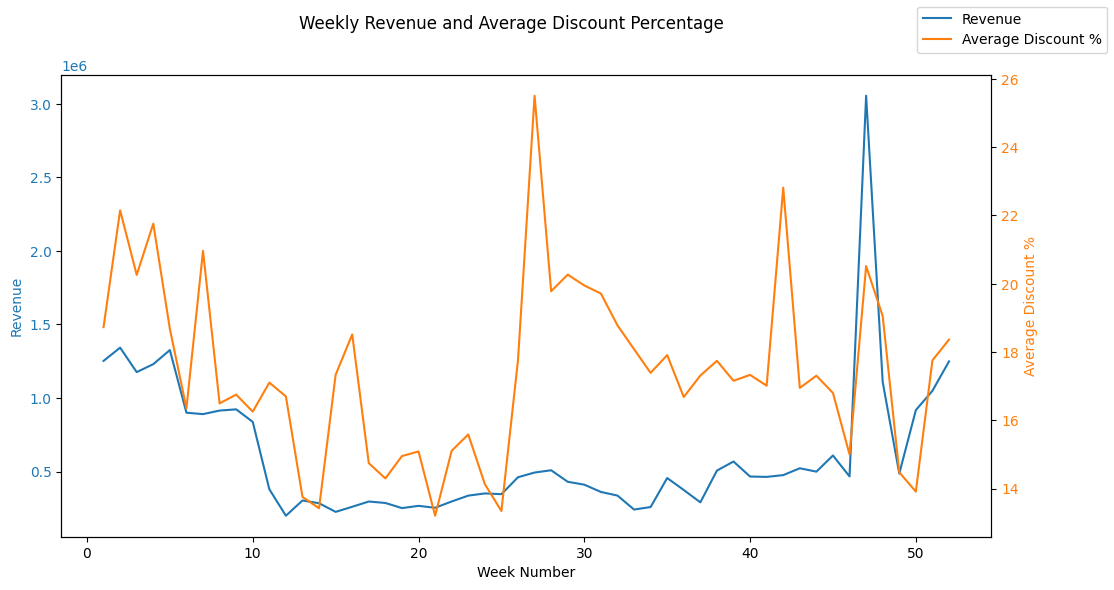

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(weekly_sales2.index, weekly_sales2['sum_price'], label='Revenue', color='tab:blue')
ax1.set_xlabel('Week Number')
ax1.set_ylabel('Revenue', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(weekly_sales2.index, weekly_sales2['off_percentage'], label='Average Discount %', color='tab:orange')
ax2.set_ylabel('Average Discount %', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.suptitle('Weekly Revenue and Average Discount Percentage')
fig.legend(loc="upper right")

plt.show()

In [ ]:
top_10_percent_weeks

,sum_base_price
week,
47,3534469.25
2,1540858.75
5,1489161.35
1,1427846.98
52,1421682.95


In [ ]:
potential_uplift_final_orderlines

,week,discount,potential_revenue
0,47,0.10,3181022.32
1,47,0.15,3004298.86
2,47,0.20,2827575.40
3,2,0.10,1386772.88
4,2,0.15,1309729.94
5,2,0.20,1232687.00
6,5,0.10,1340245.21
7,5,0.15,1265787.14
8,5,0.20,1191329.08
9,1,0.10,1285062.28


##2. Plots

Tables to plot:


*   Merged_orders
*   condition_group
* sub_category_group
* main_category_group
* final_orderlines



In [ ]:
condition_group

,sum_price,product_quantity,off_percentage
Condition,,,
New,31459812.53,104540,18.15
Used,751793.51,2275,29.07


In [ ]:
main_category_group

,sum_price,product_quantity,off_percentage
main_category,,,
Apple Electronics,22029806.65,17854,7.63
Computer Accessories,5495815.14,37554,18.78
Mobile Accessoires,2841022.64,39734,23.77
Network,1137224.28,3076,11.90
Other,278268.66,1929,25.11
Repair,441263.50,6744,17.52


In [ ]:
#save merged_category_df to csv
main_category_group.to_csv('main_category_group.csv', index=False)
sub_category_group.to_csv('sub_category_group.csv', index=False)
weekly_sales2.to_csv('weekly_sales2.csv', index=False)

<ipython-input-86-f4b48ac029c3>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  main_category_group_plot.set_xticklabels(main_category_group_plot.get_xticklabels(), rotation=90);


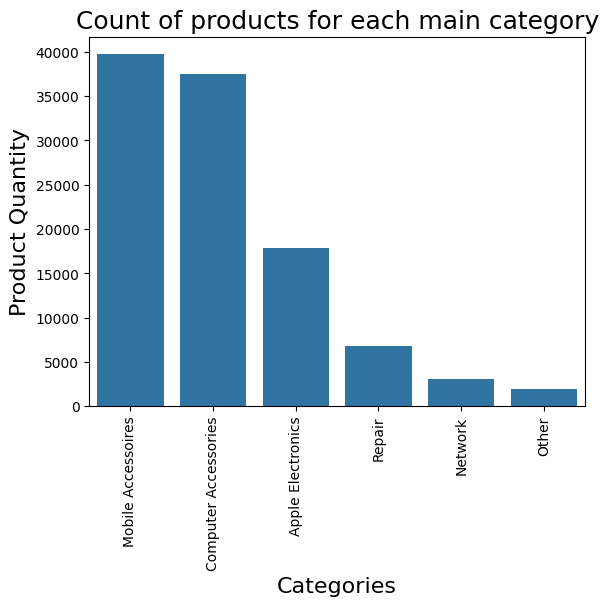

In [ ]:
quantity_order = main_category_group.sort_values(by='product_quantity',ascending=False)
main_category_group_plot = sns.barplot(
            data=quantity_order,
            x='main_category',
            y='product_quantity');
main_category_group_plot.set_title("Count of products for each main category",
                     fontsize=18)
main_category_group_plot.set_xlabel("Categories", fontsize=16);
main_category_group_plot.set_ylabel("Product Quantity",fontsize=16);
main_category_group_plot.set_xticklabels(main_category_group_plot.get_xticklabels(), rotation=90);


In [ ]:
top_15_brand = top_15_brand.reset_index()
top_15_brand

,brand,sum_price,product_quantity,off_percentage
0,Apple,22958716.83,31223,12.23
1,Wacom,872138.29,3223,18.72
2,LaCie,797341.64,3319,12.42
3,OWC,740243.95,5875,23.06
4,Synology,718415.46,1532,5.67
5,Western Digital,706042.03,4106,18.06
6,LG,593461.77,1309,10.12
7,Crucial,548035.14,3806,13.62
8,Samsung,420950.74,2180,17.18
9,Dell,393663.25,1079,17.45


<ipython-input-88-b455b5684133>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  top_15_brand_plot.set_xticklabels(top_15_brand_plot.get_xticklabels(), rotation=90);


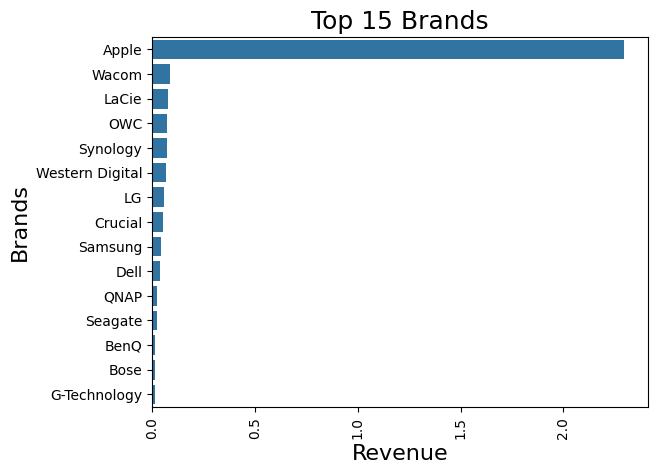

In [ ]:
top_15_brand_plot = top_15_brand.sort_values(by='sum_price',ascending=False)
top_15_brand_plot = sns.barplot(
            data=top_15_brand,
            x='sum_price',
            y='brand');
top_15_brand_plot.set_title("Top 15 Brands",
                     fontsize=18)
top_15_brand_plot.set_xlabel("Revenue", fontsize=16);
top_15_brand_plot.set_ylabel("Brands",fontsize=16);
top_15_brand_plot.set_xticklabels(top_15_brand_plot.get_xticklabels(), rotation=90);